# Porsche PEC HHR instagram profile topic analysis

In [1]:
import pandas as pd
import hdbscan
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
import plotly.express as px

/Users/kaushikdayalan/projects/storymachine_projects/porsche_topic_analysis/.env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-24 16:38:03.166251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Reading the dataframe

In [2]:
df = pd.read_csv("./data/porsche_instagram.csv")

In [3]:
df.head()

,postUrl,postContent,commentCount,likeCount,postTimestamp,type,profileUrl,username,viewCount,playCount,filteredContentEn,filteredContentDe
0,https://www.instagram.com/p/Cm6QO3Uoz-A/,Das neue Jahr hat begonnen und wir können es s...,2,298,2023-01-02 10:56:14+00:00,Photo,https://www.instagram.com/pec.hhr,pec.hhr,NaN,NaN,The new year has begun and we can hardly wait ...,Das neue Jahr hat begonnen und wir können es s...
1,https://www.instagram.com/p/CnAKVbkNMQG/,"Eines der großen Highlights, die 2023 auf Euch...",1,210,2023-01-04 18:00:09+00:00,Photo,https://www.instagram.com/pec.hhr,pec.hhr,NaN,NaN,One of the big highlights that awaits you in 2...,"Eines der großen Highlights, die 2023 auf Euch..."
2,https://www.instagram.com/p/CnE28ZQISr0/,"Mit frischer Energie, jeder Menge neuer Ideen ...",0,149,2023-01-06 13:46:55+00:00,Photo,https://www.instagram.com/pec.hhr,pec.hhr,NaN,NaN,"With fresh energy, lots of new ideas and the i...","Mit frischer Energie, jeder Menge neuer Ideen ..."
3,https://www.instagram.com/p/CnM9OMnIjOS/,"""Der 911 ist das einzige Auto, mit dem man von...",1,410,2023-01-09 17:15:41+00:00,Photo,https://www.instagram.com/pec.hhr,pec.hhr,NaN,NaN,"""The 911 is the only car that can take you fro...","""Der 911 ist das einzige Auto, mit dem man von..."
4,https://www.instagram.com/p/CnSGXu7ItaI/,Weil echte Sportler bei jedem Wetter in Bewegu...,2,383,2023-01-11 17:16:16+00:00,Video,https://www.instagram.com/pec.hhr,pec.hhr,NaN,7122.0,Because real athletes are on the move in all w...,Weil echte Sportler bei jedem Wetter in Bewegu...


In [45]:
print("Total Number of posts to read:", len(df))

Total Number of posts to read: 129


## BerTopic Model and topic modelling

In [11]:
representation_model = KeyBERTInspired()
model = BERTopic(representation_model=representation_model, n_gram_range=(1, 3))
topics, probs = model.fit_transform(df.filteredContentEn.values)

In [12]:
print("Model Topics \n")
model.get_topic_info().Name.values

array(['-1_porsche_the porsche_driving experiences_driving experience',
       '0_porsche experience center_porsche experience_grand prix_at the hockenheimring',
       '1_porsche models_porsche drivers and_porsche drivers_porsche',
       '2_porsche models_porsche_driving experience with_911 gt3'],
      dtype=object)

In [13]:
print("Topic Frequency \n")
model.get_topic_freq()

,Topic,Count
0,-1,50
1,0,30
2,1,29
3,2,20


In [49]:
print("Plotting Topic cluster \n")
try:
    model.visualize_topics()
except:
    print("Topic count too short. Cannot get visualisation")

Plotting Topic cluster 

Topic count too short. Cannot get visualisation


/Users/kaushikdayalan/projects/storymachine_projects/porsche_topic_analysis/.env/lib/python3.9/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.



Plotting Similarity Heatmap 



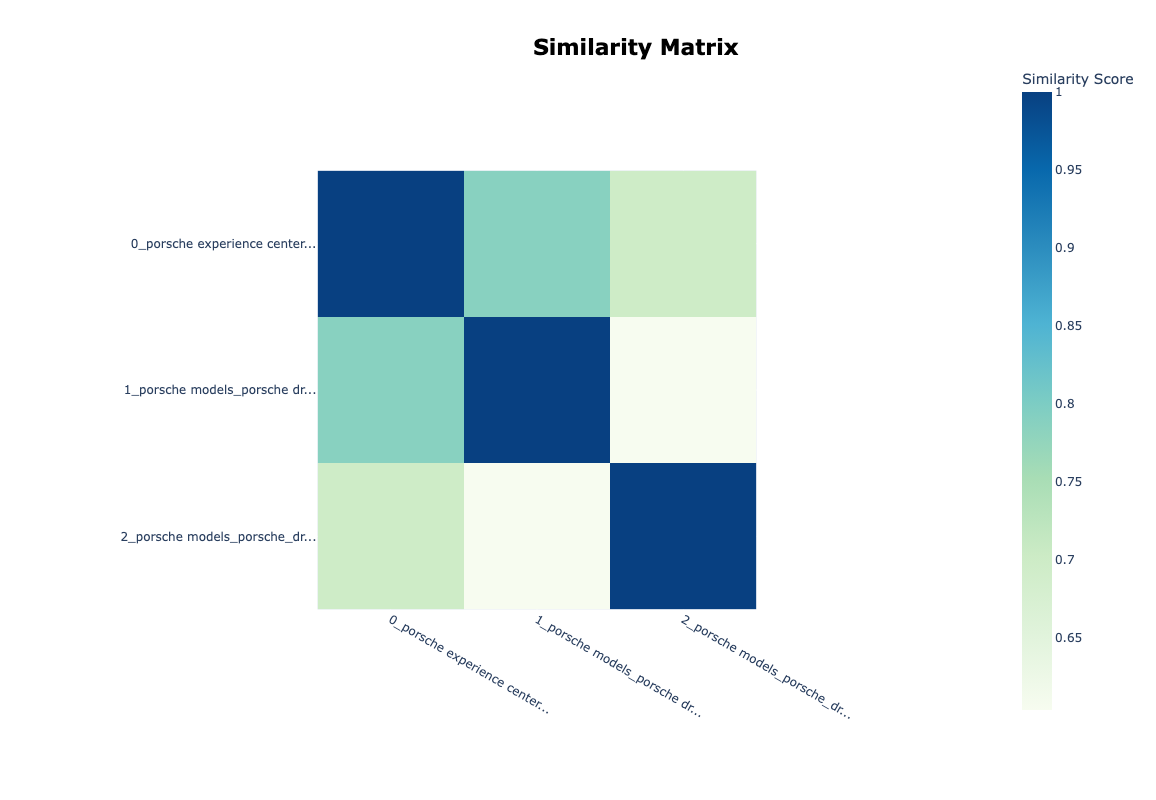

In [50]:
print("Plotting Similarity Heatmap \n")

model.visualize_heatmap()

In [16]:
topic_dataframe = model.get_document_info(df.filteredContentEn.values)

In [18]:
print("Topic Representations: \n")

for representation in model.get_topic_info().Representation:
    print(representation)
    print()

['porsche', 'the porsche', 'driving experiences', 'driving experience', 'rally', 'gt3 rs', 'new 911', 'gt3', 'driving', 'visit']
['porsche experience center', 'porsche experience', 'grand prix', 'at the hockenheimring', 'prix', 'the porsche', 'grand prix circuit', 'porsche', 'prix circuit', 'porsche or']
['porsche models', 'porsche drivers and', 'porsche drivers', 'porsche', 'porsche vehicles', 'frhschichtpechhr', 'frhschicht', 'drivers and friends', 'carscoffee', 'event']
['porsche models', 'porsche', 'driving experience with', '911 gt3', 'driving experience', 'gt3', 'gt3 rs', 'of driving fun', 'driving', 'taycan']


In [21]:
df["Topic"] = topic_dataframe["Topic"]

In [22]:
df.head()

,postUrl,postContent,commentCount,likeCount,postTimestamp,type,profileUrl,username,viewCount,playCount,filteredContentEn,filteredContentDe,Topic
0,https://www.instagram.com/p/Cm6QO3Uoz-A/,Das neue Jahr hat begonnen und wir können es s...,2,298,2023-01-02 10:56:14+00:00,Photo,https://www.instagram.com/pec.hhr,pec.hhr,NaN,NaN,The new year has begun and we can hardly wait ...,Das neue Jahr hat begonnen und wir können es s...,-1
1,https://www.instagram.com/p/CnAKVbkNMQG/,"Eines der großen Highlights, die 2023 auf Euch...",1,210,2023-01-04 18:00:09+00:00,Photo,https://www.instagram.com/pec.hhr,pec.hhr,NaN,NaN,One of the big highlights that awaits you in 2...,"Eines der großen Highlights, die 2023 auf Euch...",0
2,https://www.instagram.com/p/CnE28ZQISr0/,"Mit frischer Energie, jeder Menge neuer Ideen ...",0,149,2023-01-06 13:46:55+00:00,Photo,https://www.instagram.com/pec.hhr,pec.hhr,NaN,NaN,"With fresh energy, lots of new ideas and the i...","Mit frischer Energie, jeder Menge neuer Ideen ...",-1
3,https://www.instagram.com/p/CnM9OMnIjOS/,"""Der 911 ist das einzige Auto, mit dem man von...",1,410,2023-01-09 17:15:41+00:00,Photo,https://www.instagram.com/pec.hhr,pec.hhr,NaN,NaN,"""The 911 is the only car that can take you fro...","""Der 911 ist das einzige Auto, mit dem man von...",-1
4,https://www.instagram.com/p/CnSGXu7ItaI/,Weil echte Sportler bei jedem Wetter in Bewegu...,2,383,2023-01-11 17:16:16+00:00,Video,https://www.instagram.com/pec.hhr,pec.hhr,NaN,7122.0,Because real athletes are on the move in all w...,Weil echte Sportler bei jedem Wetter in Bewegu...,-1


## keyword/topic_representation to Topic generation (chatGPT)

In [23]:
topics = {
    -1: "Driving and Experiences",
    0: "Porsche Experience Centers and Racing",
    1: "Porsche Community and Events",
    2: "Porsche Models and Driving Experiences"
}

In [24]:
df["Topic"] = df["Topic"].map(topics)

## Plotting Topic Distribution

In [25]:
def get_topic_pie_chart(df: pd.DataFrame):
    value_count = pd.DataFrame(df.groupby(["Topic"]).size()).reset_index()
    fig = px.pie(data_frame=value_count, values=0, names="Topic", height=800, width=800)
    return fig

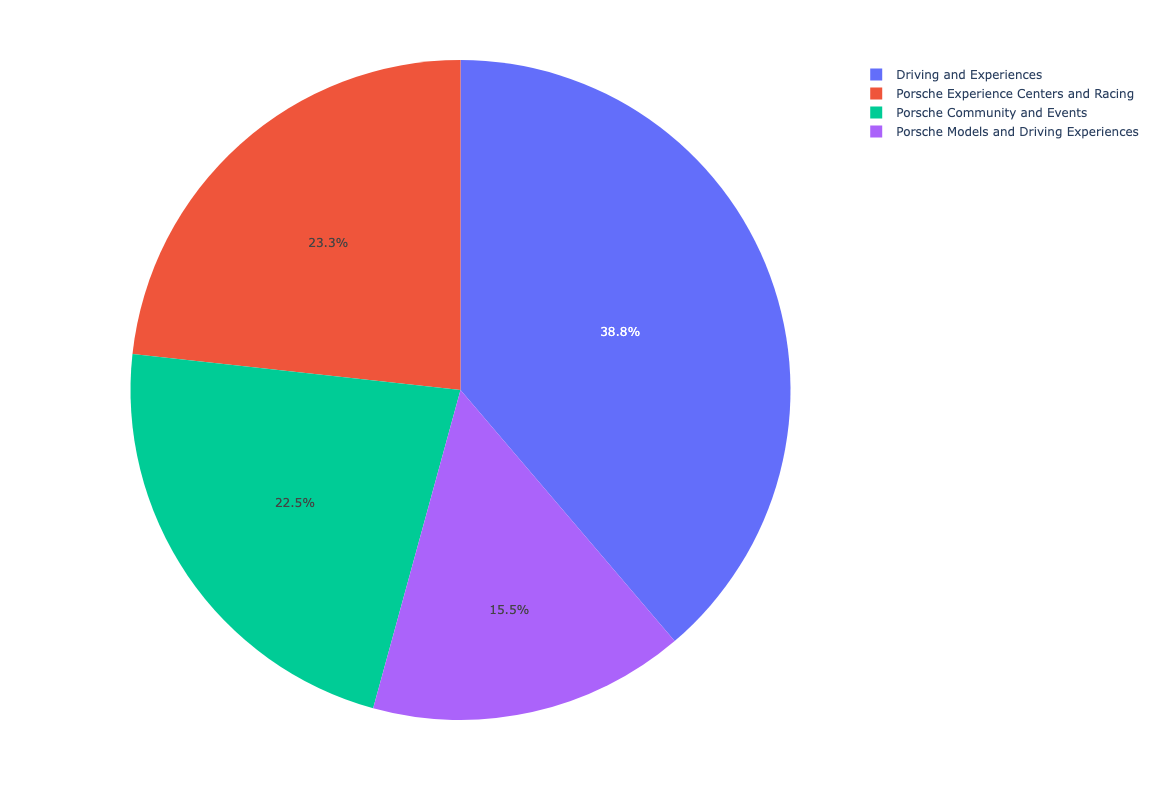

In [26]:
get_topic_pie_chart(df=df).show()

## Writing output file

In [ ]:
df.to_excel("./data/current_outputs/porsche_instagram_topics.xlsx", index=False)